# 한신대학교 e-비즈니스학과 201646006 이성범 PD학기제

# Neural Network 이란?

우리가 앞으로 배우고자 하는 내용은 컴퓨터가 스스로 학습하여 예측 모형을 개발하는 인공지능의 한 분야 중 인간의 신경망의 원리를 활용하여 만든 Deep Neural Network 이론을 이용한 딥러닝이다.

현재 딥러닝은 다양한 방면에서 활용되고 있으며 그 성능 또한 뛰어나다. 또한 딥러닝과 관련된 논문이 지속적으로 증가하고 발전속도 또한 가파르다. 이에 앞으로 딥러닝의 미래는 밝다고 볼 수 있으며 딥러닝을 활용한 다양한 애플리케이션이 개발되어 삶의 편리성이 늘어날 것이다.

이번 장에서는 Deep Neural Network의 발전 과정에 대하여 학습할 예정이다. Neural Network는 인간의 뇌에 있는 생물학적 뉴런의 네트워크에서 영감을 받은 머신러닝 모델이다. NN은 초장기 Perceptron에서 Multilayer Perceptron으로 그리고 오늘날의 Deep Neural Network로 발전하였고 다양한 학습방법이 연구되고 개발되어 CNN, RNN, GAN 등의 DNN을 활용한 다양한 모델이 개발되어 다양한 분야에서 활용되고 있다.

우리가 앞으로 배울 NN을 한문장으로 요약하면 "우리가 해결하고자 하는 문제를 해결할 수 있는 최적의 함수를 찾는 사람의 뉴런을 본따 만든 머신러닝 모델"이다.

# Perceptron


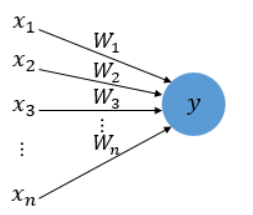

퍼셉트론은 Frank Rosenblatt가 1957년에 제안한 초기 형태의 인공 신경망으로 다수의 입력으로 부터 하나의 결과를 내보내는 알고리즘이다. 퍼셉트론은 위의 그림과 같이 input과 weight의 결합으로 이루어져 있다. 입력값 x를 받아 W를 곱해 구해진 값의 전체 합을 구하고 특정 임계치를 넘으면 0, 그렇지 않으면 1을 출력한다.

위의 그림처럼 각각의 입력값에는 각각의 가중치가 존재하고, 이때 가중치의 값이 크면 클수록 해당 입력 값이 중요하다는 것을 의미한다. 그리고 위에서 설명한 특정 임계치에 따라서 값을 변환시키는 함수를 활성화 함수라고 하며 NN에서는 필수로 알고 있어야 하는 개념이며 추후에 다룰 예정이다.

퍼셉트론도 수학적으로 한계가 입증되었는데 그것은 바로 XOR문제를 해결하지 못한다는 것이다. and, or 문제의 경우 가중치를 수정해나가는 방식을 통하여 해결할 수 있었지만 xor 문제의 경우 아무리 가중치를 수정해도 해결할 수 없었으며 이러한 문제가 수학적으로 입증되어 인공신경망에 대한 당시 사람들의 기대는 한순간에 바닥으로 떨어지게 되었다.

## OR 문제

퍼셉트론의 경우 아래 그림과 같은 OR문제의 경우 하나의 직선을 통하여 분류가 가능하다는 것을 알 수 있다.

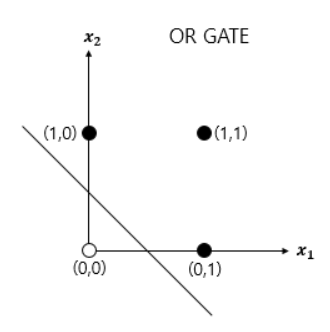

아래는 pytorch를 통하여 구현한 OR문제를 해결하는 퍼셉트론을 구현한 코드이다(실제 퍼셉트론의 가중치 초기화 방식은 아래의 코드처럼 경사하강법을 활용한 역전파를 방식을 활용하지는 않았지만 큰 차이는 없다). 아래의 코드를 보면 학습이 진행될 수록 점차 Loss가 줄어들며 제대로 학습이 진행된다는 것을 알 수 있으며 분류 또한 완벽하게 되었다는 것을 알 수 있다.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
X = torch.FloatTensor([[0, 0],
                       [1, 0],
                       [0, 1],
                       [1, 1]])

y = torch.FloatTensor([[0], [1], [1], [1]])

In [ ]:
class Perceptron(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Sequential(
        nn.Linear(2, 1),
        nn.Sigmoid()
    )

  def forward(self, x):
    return self.linear(x)

In [ ]:
model = Perceptron()
optimizer = optim.SGD(model.parameters(), lr = 0.1)
criterion = nn.BCELoss()

In [ ]:
nb_epochs = 10000
for epoch in range(nb_epochs + 1):

  # H(x) 계산
  hypothesis = model(X)

  # cost 계산
  cost = criterion(hypothesis, y)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 1000 == 0:
    print(f"EPOCH: {epoch}, LOSS: {cost.item()}")

EPOCH: 0, LOSS: 1.2923991680145264
EPOCH: 1000, LOSS: 0.09195886552333832
EPOCH: 2000, LOSS: 0.04772161319851875
EPOCH: 3000, LOSS: 0.031829532235860825
EPOCH: 4000, LOSS: 0.023776330053806305
EPOCH: 5000, LOSS: 0.018938496708869934
EPOCH: 6000, LOSS: 0.015720192342996597
EPOCH: 7000, LOSS: 0.013428464531898499
EPOCH: 8000, LOSS: 0.011715264990925789
EPOCH: 9000, LOSS: 0.010386955924332142
EPOCH: 10000, LOSS: 0.009327348321676254


In [ ]:
with torch.no_grad():
  hypothesis = model(X)
  predicted = (hypothesis > 0.5).float()
  accuracy = (predicted == y).float().mean()
  print('모델의 출력값(Hypothesis): \n', hypothesis.detach().cpu().numpy())
  print('모델의 예측값(Predicted): \n', predicted.detach().cpu().numpy())
  print('실제값(Y): \n', y.cpu().numpy())
  print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis): 
 [[0.02058144]
 [0.9917801 ]
 [0.99177986]
 [0.99999857]]
모델의 예측값(Predicted): 
 [[0.]
 [1.]
 [1.]
 [1.]]
실제값(Y): 
 [[0.]
 [1.]
 [1.]
 [1.]]
정확도(Accuracy):  1.0


## AND 문제

퍼셉트론의 경우 아래 그림과 같은 AND문제의 경우 하나의 직선을 통하여 분류가 가능하다는 것을 알 수 있다.

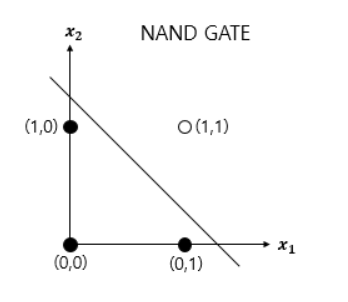

아래는 pytorch를 통하여 구현한 AND문제를 해결하는 퍼셉트론을 구현한 코드이다(실제 퍼셉트론의 가중치 초기화 방식은 아래의 코드처럼 경사하강법을 활용한 역전파를 방식을 활용하지는 않았지만 큰 차이는 없다). 아래의 코드를 보면 학습이 진행될 수록 점차 Loss가 줄어들며 제대로 학습이 진행된다는 것을 알 수 있으며 분류 또한 완벽하게 되었다는 것을 알 수 있다.

In [ ]:
X = torch.FloatTensor([[0, 0],
                       [1, 0],
                       [0, 1],
                       [1, 1]])

y = torch.FloatTensor([[0], [0], [0], [1]])

In [ ]:
class Perceptron(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Sequential(
        nn.Linear(2, 1),
        nn.Sigmoid()
    )

  def forward(self, x):
    return self.linear(x)

In [ ]:
model = Perceptron()
optimizer = optim.SGD(model.parameters(), lr = 0.1)
criterion = nn.BCELoss()

In [ ]:
nb_epochs = 10000
for epoch in range(nb_epochs + 1):

  # H(x) 계산
  hypothesis = model(X)

  # cost 계산
  cost = criterion(hypothesis, y)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 1000 == 0:
    print(f"EPOCH: {epoch}, LOSS: {cost.item()}")

EPOCH: 0, LOSS: 0.7233124375343323
EPOCH: 1000, LOSS: 0.14368876814842224
EPOCH: 2000, LOSS: 0.08171217143535614
EPOCH: 3000, LOSS: 0.05658114328980446
EPOCH: 4000, LOSS: 0.04308402165770531
EPOCH: 5000, LOSS: 0.03470665588974953
EPOCH: 6000, LOSS: 0.02901851013302803
EPOCH: 7000, LOSS: 0.02491183578968048
EPOCH: 8000, LOSS: 0.021811462938785553
EPOCH: 9000, LOSS: 0.019390029832720757
EPOCH: 10000, LOSS: 0.01744774356484413


In [ ]:
with torch.no_grad():
  hypothesis = model(X)
  predicted = (hypothesis > 0.5).float()
  accuracy = (predicted == y).float().mean()
  print('모델의 출력값(Hypothesis): \n', hypothesis.detach().cpu().numpy())
  print('모델의 예측값(Predicted): \n', predicted.detach().cpu().numpy())
  print('실제값(Y): \n', y.cpu().numpy())
  print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis): 
 [[1.2514901e-05]
 [2.0273976e-02]
 [2.0273976e-02]
 [9.7160417e-01]]
모델의 예측값(Predicted): 
 [[0.]
 [0.]
 [0.]
 [1.]]
실제값(Y): 
 [[0.]
 [0.]
 [0.]
 [1.]]
정확도(Accuracy):  1.0


## XOR 문제

퍼셉트론의 경우 아래 그림과 같은 XOR문제의 경우 하나의 직선을 통하여 분류가 불가능하다는 것을 알 수 있다.

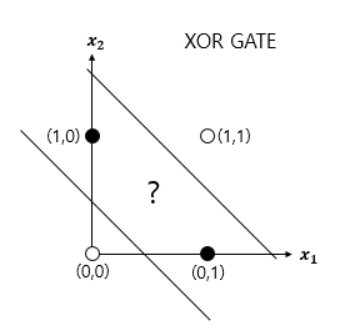

아래는 pytorch를 통하여 구현한 XOR문제를 해결하는 퍼셉트론을 구현한 코드이다(실제 퍼셉트론의 가중치 초기화 방식은 아래의 코드처럼 경사하강법을 활용한 역전파를 방식을 활용하지는 않았지만 큰 차이는 없다). 아래의 코드를 보면 특정 EPOCH 이후로 Loss가 줄어들지 않는다는 것을 확인할 수 있으며 제대로 학습이 진행되지 않는다는 것을 알 수 있다. 또한 값도 제대로 분류하지 못하다는 것을 확인할 수 있다. 이처럼 퍼셉트론은 XOR문제를 해결할 수 없는 구조를 가지고 있다.

In [ ]:
X = torch.FloatTensor([[0, 0],
                       [1, 0],
                       [0, 1],
                       [1, 1]])

y = torch.FloatTensor([[0], [1], [1], [0]])

In [ ]:
class Perceptron(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Sequential(
        nn.Linear(2, 1),
        nn.Sigmoid()
    )

  def forward(self, x):
    return self.linear(x)

In [ ]:
model = Perceptron()
optimizer = optim.SGD(model.parameters(), lr = 0.1)
criterion = nn.BCELoss()

In [ ]:
nb_epochs = 10000
for epoch in range(nb_epochs + 1):

  # H(x) 계산
  hypothesis = model(X)

  # cost 계산
  cost = criterion(hypothesis, y)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 1000 == 0:
    print(f"EPOCH: {epoch}, LOSS: {cost.item()}")

EPOCH: 0, LOSS: 0.7175409197807312
EPOCH: 1000, LOSS: 0.6931471824645996
EPOCH: 2000, LOSS: 0.6931471824645996
EPOCH: 3000, LOSS: 0.6931471824645996
EPOCH: 4000, LOSS: 0.6931471824645996
EPOCH: 5000, LOSS: 0.6931471824645996
EPOCH: 6000, LOSS: 0.6931471824645996
EPOCH: 7000, LOSS: 0.6931471824645996
EPOCH: 8000, LOSS: 0.6931471824645996
EPOCH: 9000, LOSS: 0.6931471824645996
EPOCH: 10000, LOSS: 0.6931471824645996


In [ ]:
with torch.no_grad():
  hypothesis = model(X)
  predicted = (hypothesis > 0.5).float()
  accuracy = (predicted == y).float().mean()
  print('모델의 출력값(Hypothesis): \n', hypothesis.detach().cpu().numpy())
  print('모델의 예측값(Predicted): \n', predicted.detach().cpu().numpy())
  print('실제값(Y): \n', y.cpu().numpy())
  print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis): 
 [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 예측값(Predicted): 
 [[0.]
 [0.]
 [0.]
 [0.]]
실제값(Y): 
 [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


# Multilayer Perceptron

MLP는 XOR 문제를 해결한 인공신경망이다. 1985년 Rumelhart, Williams, Hinton이 Error Backpropagation Algorithm을 개발함으로써 MLP의 학습이 가능하게 되었고 MLP를 통하여 XOR문제를 해결해 다시 한번 인공신경망의 붐이 일어나게 되었다.

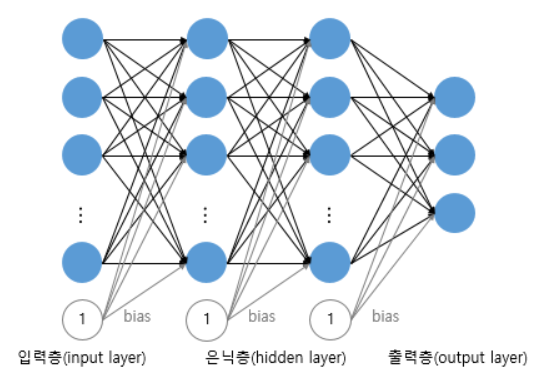

MLP는 기존의 input layer와 ouput layer로 이루어졌던 퍼셉트론에 위의 그림 처럼 중간에 hidden layer을 추가한 모양이다. 은닉층이 2개 이상인 MLP를 DNN이라고 하고 이러한 DNN을 변형한 다양한 신경망을 CNN, RNN, GAN 등의 이름으로 부른다. 그리고 과거에는 가중치를 직접 사람이 계산하여 찾았지만 역전파 알고리즘의 개발로 Loss function, Optimizer 등을 통하여 기계가 가중치를 스스로 찾아낼 수 있도록 학습할 수 있게 되었다. 그러나 MLP도 부족한 데이터셋, 오버피팅, 지역최적화, 컴퓨터 성능의 한계로 인해 다시 한번 인공신경망에 대한 기대가 가라 앉게 되었다. 다음 주차에는 이러한 인공신경망의 한계를 극복한 방법에 대하여 학습할 예정이다.

## MLP의 XOR 문제

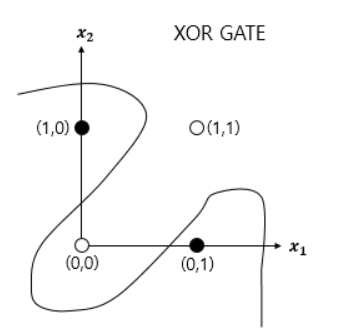

아래의 코드는 중간에 노드가 10개인 은닉층을 1개 두어 XOR문제를 해결하는 MLP를 pytorch를 통하여 구현한 코드이다. 아래를 보면 학습이 진행될 수록 퍼셉트론과 달리  Loss가 점차 감소한다는 것을 알 수 있으며 분류 또한 제대로 이루어진다는 것을 확인할 수 있다.

In [ ]:
X = torch.FloatTensor([[0, 0],
                       [1, 0],
                       [0, 1],
                       [1, 1]])

y = torch.FloatTensor([[0], [1], [1], [0]])

In [ ]:
class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Sequential(
        nn.Linear(2, 10),
        nn.Sigmoid(),
        nn.Linear(10, 1), # 10개의 노드를 가지는 1개의 은닉층 생성
        nn.Sigmoid()
    )

  def forward(self, x):
    return self.linear(x)

In [ ]:
model = MLP()
optimizer = optim.SGD(model.parameters(), lr = 0.1)
criterion = nn.BCELoss()

In [ ]:
nb_epochs = 10000
for epoch in range(nb_epochs + 1):

  # H(x) 계산
  hypothesis = model(X)

  # cost 계산
  cost = criterion(hypothesis, y)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 1000 == 0:
    print(f"EPOCH: {epoch}, LOSS: {cost.item()}")

EPOCH: 0, LOSS: 0.6942969560623169
EPOCH: 1000, LOSS: 0.6921975612640381
EPOCH: 2000, LOSS: 0.6882604360580444
EPOCH: 3000, LOSS: 0.6495662331581116
EPOCH: 4000, LOSS: 0.400748074054718
EPOCH: 5000, LOSS: 0.11533121764659882
EPOCH: 6000, LOSS: 0.0511920303106308
EPOCH: 7000, LOSS: 0.031123246997594833
EPOCH: 8000, LOSS: 0.02195087820291519
EPOCH: 9000, LOSS: 0.0168134868144989
EPOCH: 10000, LOSS: 0.013563135638833046


In [ ]:
with torch.no_grad():
  hypothesis = model(X)
  predicted = (hypothesis > 0.5).float()
  accuracy = (predicted == y).float().mean()
  print('모델의 출력값(Hypothesis): \n', hypothesis.detach().cpu().numpy())
  print('모델의 예측값(Predicted): \n', predicted.detach().cpu().numpy())
  print('실제값(Y): \n', y.cpu().numpy())
  print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis): 
 [[0.01344184]
 [0.98397887]
 [0.9883984 ]
 [0.01280589]]
모델의 예측값(Predicted): 
 [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y): 
 [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


# Activation Function

아래의 코드는 위의 MLP에서 중간에 존재했던 Sigmoid를 제거한 코드이다. 아래의 코드를 보면 은닉층은 존재하지만 퍼셉트론 처럼 값을 제대로 분류할 수 없으며 헉습도 제대로 이루어지지 않는 것을 확인할 수 있다.

이처럼 무작정 은닉층을 쌓는 것 만으로는 퍼셉트론을 비선형 분류기로 바꿀 수 없다. 따라서 중간에 Sigmoid와 같은 비선형의 활성화 함수가 필요하고 이러한 활성화 함수를 통하여 각 층마다 특성을 가질 수 있고 제대로된 학습이 진행될 수 있다.

그런데 이러한 방식으로 무작정 층을 쌓는 것은 기울기 소실 등의 문제를 가져와 학습이 제대로 진행될 수 없게 된다. 이러한 문제를 해결하기 위해서 다양한 활성화 함수가 개발되었고 다음 주에는 이런 다양한 활성화 함수에 대하여 학습할 예정이다.

In [ ]:
X = torch.FloatTensor([[0, 0],
                       [1, 0],
                       [0, 1],
                       [1, 1]])

y = torch.FloatTensor([[0], [1], [1], [0]])

In [ ]:
class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Sequential(
        nn.Linear(2, 10),
        nn.Linear(10, 1), # 10개의 노드를 가지는 1개의 은닉층 생성
        nn.Sigmoid()
    )

  def forward(self, x):
    return self.linear(x)

In [ ]:
model = MLP()
optimizer = optim.SGD(model.parameters(), lr = 0.1)
criterion = nn.BCELoss()

In [ ]:
nb_epochs = 10000
for epoch in range(nb_epochs + 1):

  # H(x) 계산
  hypothesis = model(X)

  # cost 계산
  cost = criterion(hypothesis, y)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 1000 == 0:
    print(f"EPOCH: {epoch}, LOSS: {cost.item()}")

EPOCH: 0, LOSS: 0.7647101879119873
EPOCH: 1000, LOSS: 0.6931471824645996
EPOCH: 2000, LOSS: 0.6931471824645996
EPOCH: 3000, LOSS: 0.6931471824645996
EPOCH: 4000, LOSS: 0.6931471824645996
EPOCH: 5000, LOSS: 0.6931471824645996
EPOCH: 6000, LOSS: 0.6931471824645996
EPOCH: 7000, LOSS: 0.6931471824645996
EPOCH: 8000, LOSS: 0.6931471824645996
EPOCH: 9000, LOSS: 0.6931471824645996
EPOCH: 10000, LOSS: 0.6931471824645996


In [ ]:
with torch.no_grad():
  hypothesis = model(X)
  predicted = (hypothesis > 0.5).float()
  accuracy = (predicted == y).float().mean()
  print('모델의 출력값(Hypothesis): \n', hypothesis.detach().cpu().numpy())
  print('모델의 예측값(Predicted): \n', predicted.detach().cpu().numpy())
  print('실제값(Y): \n', y.cpu().numpy())
  print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis): 
 [[0.50000006]
 [0.49999994]
 [0.5000001 ]
 [0.49999994]]
모델의 예측값(Predicted): 
 [[1.]
 [0.]
 [1.]
 [0.]]
실제값(Y): 
 [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


# Loss Function

Loss Function은 모델이 예측한 출력값과 실제값의 차이를 계산하는 함수이다.

인공신경망은 입력 -> 은닉층 -> 출력층 순으로 학습이 진행되는데 이를 순전파라고 하며 순전파를 거쳐서 출력값을 내보내게 된다. 이러한 출력값이 실제값과의 차이를 계산하는 함수를 Loss Function 이라하며 모델의 최종 목적은 이러한 Loss Function, 즉 예측값과 실제값의 차이를 최소화하는 가중치(W)를 찾는 것이 목적이다.

NN에서 사용되는 Loss Function은 크게 Mean Squared Error와 Cross Entropy Error가 존재한다.

MSE는 회귀에 적합한 Loss Function이고 CEE는 분류에 적합한 Loss Function이다. 우리가 위에서 사용한 BCELoss 함수는 이진분류에서 활용되는 CEE의 일종이다. 

우리는 학습시키고자 하는 모델의 목적에 따라서 적절한 손실함수를 설정하여 모델을 학습시켜 최적의 가중치를 찾아야 할 것이다.

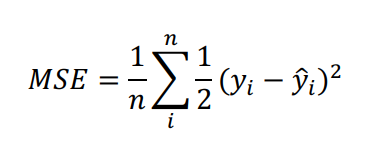

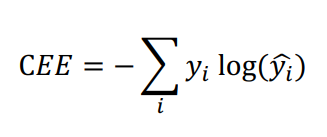

# Back Propagation

우리는 앞서 NN 모델의 최종 목적이 Loss Function, 예측값과 실제값의 차이를 최소화하는 가중치(W)를 찾는 것이라는 것을 배웠다. 그렇다면 손실함수가 최소가 되는 가중치를 어떻게 찾을 수 있을까? 에 대한 물음의 해답이 바로 역전파이다.

역전파는 순전파의 반대 방향으로 출력층 -> 은닉층 -> 입력 순으로 이루어진다. 위 과정을 통하여 W를 갱신하게 되고 갱신된 W를 통하여 다시 손실 함수를 구하고 이러한 과정이 손실함수가 전역최적점에 이룰 때까지 반복된다.

역전파를 이해하기 위해서는 기본적으로 편미분과 연쇄 법칙에 대한 이해가 수반되어야 하지만 본 과제에서는 이러한 수학적 정의보다 역전파를 직관적으로 이해하는데 초점을 둘 것 이다.

손실함수가 아래의 그림과 같은 그래프를 가진다 할 때 손실함수가 최저가 되는 지점은 바로 손실함수의 기울기가 0이 되는 지점이다. 따라서 특정 위치의 손실함수의 기울기를 미분을 통하여 구한 뒤 미분 값에 따라서 기울기가 양수이면 W를 감소시키고, 음수이면 W를 증가시키는 식의 경사하강법을 통하여 손실함수가 최소가되는 W를 찾을 수 있고 이러한 과정을 통하여 W를 업데이트 할 수 있다.(그림에서는 말하는 발걸음은 Learning Rate를 의미하며 lr에 따라서 갱신되는 W의 값이 차이가 존재한다. lr자체는 하이퍼 파라미터 이기 때문에 모델에 따라서 다르게 정의하여 학습을 진행해야 한다.)

이처럼 인공 신경망의 학습은 순전파와 역전파의 반복을 통하여 오차를 최소화하는 가중치를 찾는 것을 말한다.

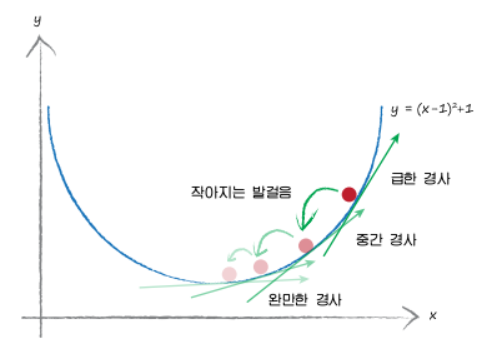

# 참고자료

- 파이썬 머신러닝 완벽 가이드, 권철민
- 파이썬 딥러닝 파이토치, 이경택
- 핸즈온 머신러닝, 박해선
- 데이터 사이언스 스쿨, https://datascienceschool.net/
- 데이터 분석 대표 대학생 연합 동아리 Tobigs, http://www.datamarket.kr/
- DeepLearnig.AI Course 1 ~ 5, Andrew Ng, https://www.youtube.com/c/Deeplearningai/playlists
- 모두를 위한 딥러닝 시즌 2, https://deeplearningzerotoall.github.io/season2/
- T아카데미 Scikit-Learn으로 다지는 머신러닝 기초, 강천성, https://tacademy.skplanet.com/live/player/onlineLectureDetail.action
- Pytorch로 시작하는 딥 러닝 입문, 유원준, https://wikidocs.net/book/2788
- http://neuralnetworksanddeeplearning.com/index.html
- https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi
- https://chacha95.github.io/2018-11-28-Deeplearning2/
- https://velog.io/@sset2323/05-03.-%EB%B9%84%EC%9A%A9-%EC%B5%9C%EC%86%8C%ED%99%94%ED%95%98%EA%B8%B0-%EA%B2%BD%EC%82%AC-%ED%95%98%EA%B0%95%EB%B2%95Gradient-Descent-%EC%86%8C%EA%B0%9C